In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit
plt.style.use("bmh")

In [6]:
def cargar_datos(file_name : str, pow_measure = False) -> list:

    # Cargamos los datos
    with open(file_name, "rb") as f:
        dic = pickle.load(f)
    # Hago una lista con los valores de offset que alimentamos con el generador de funciones
    offs_values_keys = list(dic.keys())
    # Valores de corriente en mA
    corr_values = [np.mean(dic[offset]["V_2"])*1000 for offset in offs_values_keys]
    # Verdaderos valores de continua
    offs_true_values = [np.mean(dic[offset]["V_1"]) for offset in offs_values_keys]
    # Le sacamos la "V" a las keys
    offs_values = [float(offset[:-1]) for offset in offs_values_keys]

    # Creamos una lista para guardar todos los datos que nos interesan
    lista_mediciones = [offs_values, offs_true_values, corr_values]

    # Mediciones de la potencia
    if pow_measure:
        POW_values = [np.mean(dic[offset]["POW"])*1000 for offset in offs_values_keys] # Potencia en mW
        POW_var_values = [np.std(dic[offset]["POW"])*1000 for offset in offs_values_keys] # Potencia en mW

        lista_mediciones.append(POW_values)
        lista_mediciones.append(POW_var_values)

    return lista_mediciones

In [17]:
mediciones = ["verde","total"]#, "rojo", "completa"]
# Para guardar los datos
dic_pow = {}
# Para considerar la medicion mala, numero 16. Si es falso se la saca.
dato_malo = False

for color in mediciones:
    file_name = f"../mediciones/Barrido para potencia {color} 1905.pickle"

    *_, corr_values, POW_values, POW_var_values = cargar_datos(file_name, pow_measure = True)

    if dato_malo == False:
        corr_values.pop(7)
        POW_values.pop(7)
        POW_var_values.pop(7)

    # Metemos los datos en un diccionario
    dic_pow[f"corr:{color}"] = np.array(corr_values)
    dic_pow[f"pow:{color}"] = np.array(POW_values)
    dic_pow[f"sigma:{color}"] = np.array(POW_var_values)

In [18]:
dic_pow["pow:total"]

array([1.81358615e-04, 1.10288475e-03, 3.61684709e-03, 1.07780743e-02,
       3.18579802e-02, 9.26455254e-02, 1.96783966e-01, 4.03063171e+00,
       6.30463103e+00, 1.08746640e+01, 1.42195444e+01, 1.72082031e+01,
       1.96545351e+01, 2.24491468e+01, 2.58508779e+01, 3.02791793e+01,
       3.37184746e+01, 3.77706777e+01, 4.20868903e+01])

## Potencia segun la corriente 

IndexError: list index out of range

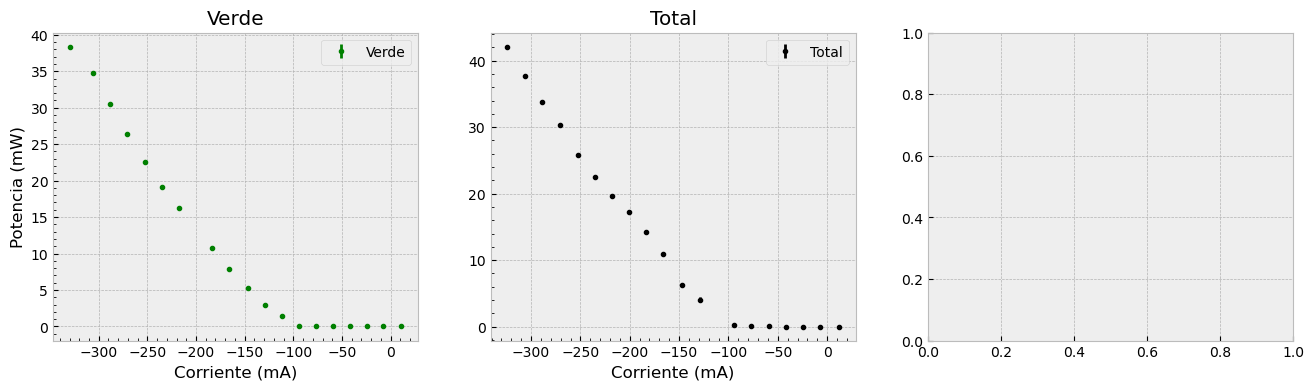

In [19]:
# Definimos listas para las labels y los colores de los graficos
labels = ["Verde", "Total","Rojo"]
marker_color = ["g","k", "r"]

fig, axs = plt.subplots(1,len(labels), figsize=(16,4))
for i, ax in enumerate(fig.axes):
    color = mediciones[i]

    corr_values = dic_pow[f"corr:{color}"]
    POW_values = dic_pow[f"pow:{color}"] 
    POW_var_values = dic_pow[f"sigma:{color}"] 

    ax.errorbar(corr_values, POW_values,yerr = POW_var_values,fmt = f".{marker_color[i]}", label = f"{labels[i]}")
    ax.set_xlabel("Corriente (mA)")
    if i == 0:
        ax.set_ylabel("Potencia (mW)")
    ax.set_title(f"{labels[i]}")
    ax.minorticks_on()
    ax.legend()
plt.show()

## Potencia de Verde+Rojo contra potencia Total

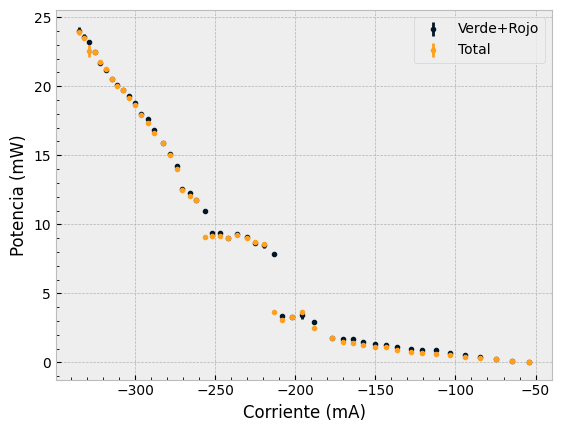

In [24]:
POW_values_suma = dic_pow["pow:rojo"]+dic_pow["pow:verde"]
POW_var_values_suma = dic_pow["sigma:rojo"]+dic_pow["sigma:verde"]

plt.errorbar(corr_values, POW_values_suma, yerr = POW_var_values_suma, fmt = ".", color = "#011627", label = "Verde+Rojo")
plt.errorbar(corr_values, dic_pow["pow:completa"],yerr = dic_pow["sigma:completa"] ,fmt = ".", color = "#FF9F1C", label = "Total")
plt.xlabel("Corriente (mA)")
plt.ylabel("Potencia (mW)")
plt.minorticks_on()
plt.legend()
plt.show()

## Diferencia relativa

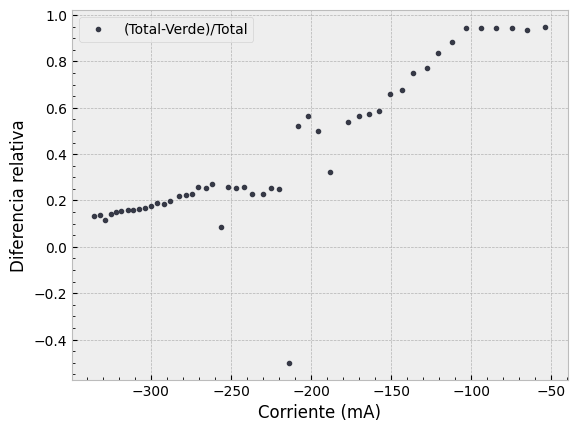

In [29]:
POW_relativa = (dic_pow["pow:completa"]-dic_pow["pow:verde"])/dic_pow["pow:completa"]
plt.plot(corr_values, POW_relativa,".",color = "#363946", label = "(Total-Verde)/Total")
plt.legend()
plt.ylabel("Diferencia relativa")
plt.xlabel("Corriente (mA)")
plt.minorticks_on()
plt.show()

## Total-Verde

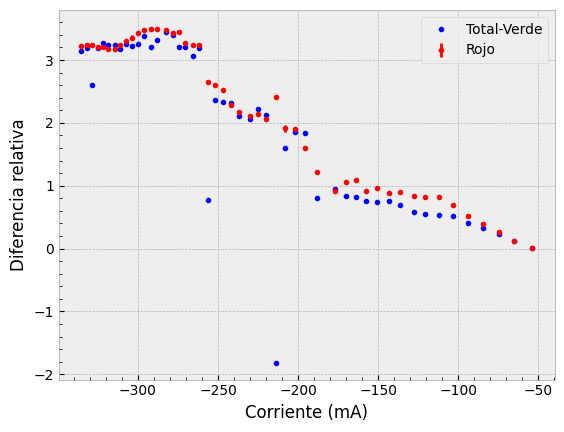

In [31]:
POW_diff = dic_pow["pow:completa"]-dic_pow["pow:verde"]
plt.plot(corr_values, POW_diff,".b", label = "Total-Verde")
plt.errorbar(corr_values, dic_pow["pow:rojo"],yerr = dic_pow["sigma:rojo"],fmt = ".r", label = "Rojo")
plt.legend()
plt.ylabel("Diferencia relativa")
plt.xlabel("Corriente (mA)")
plt.minorticks_on()
plt.show()